IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M4\NO_FAULT4


VARIABILE RCOU POTENZA MOTORI

In [3]:
pd.set_option('display.max_rows',700)

In [4]:
#andiamo a prendere una potenza media di 1400 per considerare il momento il cui inizia/finisce il volo
rcou_m4 = pd.read_csv("RCOU.csv")
rcou_m4 = rcou_m4.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m4 = rcou_m4[((rcou_m4['C9'] >= 1400) & (rcou_m4['C10'] >= 1400) & (rcou_m4['C11'] >= 1400) & (rcou_m4['C12'] >= 1400) & (rcou_m4['C13'] >= 1400) & (rcou_m4['C14']>= 1400))]

display(rcou_m4)

,TimeUS,C9,C10,C11,C12,C13,C14
1557,76471372,1411,1475,1464,1423,1428,1459
1560,76504045,1499,1424,1452,1473,1487,1438
1561,76515117,1454,1483,1507,1428,1491,1445
1562,76525907,1442,1506,1508,1440,1475,1475
1563,76536828,1463,1498,1504,1458,1485,1478
...,...,...,...,...,...,...,...
7017,136760955,1579,1476,1595,1457,1427,1619
7018,136771695,1586,1467,1610,1437,1454,1597
7023,136823888,1633,1404,1581,1472,1479,1575
7024,136833858,1603,1445,1592,1458,1455,1594


In [5]:
#xkf utilizzato per fare poi il confronto con i valori di roll, pitch e yaw in att
xkf1_m4 = pd.read_csv("XKF1_0.csv")
xkf1_m4 = xkf1_m4.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m4 = xkf1_m4[((xkf1_m4['TimeUS'] >= 76471372) & (xkf1_m4['TimeUS'] <= 136848913))]
print(xkf1_m4)

         TimeUS  Roll  Pitch     Yaw
1559   76480077  1.65  -1.07   16.30
1560   76490403  1.71  -1.04   16.30
1561   76501140  1.70  -1.03   16.29
1562   76511988  1.67  -1.05   16.28
1563   76523151  1.64  -1.04   16.28
...         ...   ...    ...     ...
7023  136800816 -1.73   0.07  355.35
7024  136811131 -1.72   0.04  355.34
7025  136821892 -1.71   0.04  355.34
7026  136831987 -1.74   0.05  355.34
7027  136846510 -1.83   0.11  355.33

[5469 rows x 4 columns]


In [6]:
att_m4 = pd.read_csv("ATT.csv")
att_m4 = att_m4.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m4 = att_m4[((att_m4['TimeUS'] >= 76471372) & (att_m4['TimeUS'] <= 136848913))]
print(att_m4)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw
1560   76481377     0.13  1.65      0.16  -1.07   16.23   16.30
1561   76492278     0.12  1.71      0.15  -1.04   16.23   16.30
1562   76503313     0.11  1.70      0.15  -1.03   16.23   16.29
1563   76514253     0.10  1.67      0.14  -1.05   16.23   16.28
1564   76525242     0.09  1.64      0.14  -1.04   16.23   16.28
...         ...      ...   ...       ...    ...     ...     ...
7025  136802243     0.71 -1.73     -1.40   0.07  354.13  355.36
7026  136812901     0.75 -1.72     -1.40   0.04  354.13  355.35
7027  136823075     0.79 -1.71     -1.40   0.04  354.13  355.35
7028  136833108     0.84 -1.74     -1.41   0.05  354.13  355.35
7029  136848053     0.87 -1.83     -1.42   0.11  354.13  355.34

[5470 rows x 7 columns]


In [7]:
#controllo corrispondenza valori roll, pitch, yaw
att_m4 = pd.merge_asof(att_m4, xkf1_m4, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m4)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw
0      76481377     0.13  1.65      0.16  -1.07   16.23   16.30
1      76492278     0.12  1.71      0.15  -1.04   16.23   16.30
2      76503313     0.11  1.70      0.15  -1.03   16.23   16.29
3      76514253     0.10  1.67      0.14  -1.05   16.23   16.28
4      76525242     0.09  1.64      0.14  -1.04   16.23   16.28
...         ...      ...   ...       ...    ...     ...     ...
5465  136802243     0.71 -1.73     -1.40   0.07  354.13  355.36
5466  136812901     0.75 -1.72     -1.40   0.04  354.13  355.35
5467  136823075     0.79 -1.71     -1.40   0.04  354.13  355.35
5468  136833108     0.84 -1.74     -1.41   0.05  354.13  355.35
5469  136848053     0.87 -1.83     -1.42   0.11  354.13  355.34

[5470 rows x 7 columns]


In [8]:
#elettricita' che scorre nel motore considerato, al momento ne consideriamo solo 1
esc_3_m4 = pd.read_csv("ESC_3.csv")
esc_3_m4 = esc_3_m4.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_3_m4 = esc_3_m4[((esc_3_m4['TimeUS'] >= 76471372) & (esc_3_m4['TimeUS'] <= 136848913))]
print(esc_3_m4)

        TimeUS   RPM  Curr
147   76581526  3595  2.67
148   76795560  4804  3.93
149   76906451  5703  3.32
150   77011864  5753  2.95
151   77121339  5680  2.57
152   77236499  5383  2.54
153   77341935  5355  2.22
154   77455264  5320  2.41
155   77558324  5239  2.44
156   77674071  5167  1.90
157   77780820  4995  1.81
158   77891786  4953  2.49
159   77997984  4917  2.28
160   78115099  4998  2.06
161   78223699  4966  2.21
162   78334076  4919  2.32
163   78550884  4978  2.58
164   78659290  5200  2.65
165   78767504  5341  2.33
166   78872356  5128  2.29
167   78978303  5159  2.44
168   79101512  5250  2.69
169   79212143  5330  2.56
170   79312216  5221  2.72
171   79418819  5357  2.65
172   79534088  5412  2.86
173   79638842  5407  3.26
174   79747671  5586  3.05
175   79850527  5599  2.97
176   79967127  5558  2.59
177   80176573  5426  2.18
178   80284852  5268  2.08
179   80392324  5098  2.26
180   80503352  5012  2.48
181   80723797  4971  2.21
182   80833581  4972  2.17
1

In [9]:
#valori di accelerazione e del giroscopio
imu_2_m4 = pd.read_csv("IMU_2.csv")
imu_2_m4 = imu_2_m4.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m4 = imu_2_m4[((imu_2_m4['TimeUS'] >= 76471372) & (imu_2_m4['TimeUS'] <= 136848913))]
print(imu_2_m4)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
6157    76473579 -0.169266  0.021125 -0.012181 -0.319088 -0.219859 -10.002680
6158    76475890  0.024126 -0.005273 -0.004552 -0.361357 -0.173894 -10.032220
6159    76478684  0.173219  0.034014  0.004597 -0.374699 -0.174534 -10.012520
6160    76481275  0.075142  0.046053  0.006682 -0.341097 -0.155730  -9.969897
6161    76483790 -0.103179  0.009438 -0.000625 -0.311098 -0.139659  -9.874392
...          ...       ...       ...       ...       ...       ...        ...
26951  136830478 -0.166895  0.059771 -0.005703 -0.450513  0.099443  -9.566114
26952  136832936  0.000707 -0.024606 -0.005068 -0.380060  0.071109  -9.375755
26953  136835711  0.040491  0.000729  0.006234 -0.306330  0.107539  -9.509895
26954  136841561 -0.052271  0.117958  0.003862 -0.190619  0.239497  -9.656898
26955  136847878  0.042394 -0.030998 -0.016675 -0.101192  0.467543  -9.978669

[20799 rows x 7 columns]


In [10]:
#sincronizzazione dei tempi tra att e imu_2
m4_nofault = pd.merge_asof(att_m4, imu_2_m4, on="TimeUS",  tolerance= 100000)
print(m4_nofault)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw      GyrX  \
0      76481377     0.13  1.65      0.16  -1.07   16.23   16.30  0.075142   
1      76492278     0.12  1.71      0.15  -1.04   16.23   16.30  0.145708   
2      76503313     0.11  1.70      0.15  -1.03   16.23   16.29  0.026057   
3      76514253     0.10  1.67      0.14  -1.05   16.23   16.28 -0.060946   
4      76525242     0.09  1.64      0.14  -1.04   16.23   16.28 -0.102430   
...         ...      ...   ...       ...    ...     ...     ...       ...   
5465  136802243     0.71 -1.73     -1.40   0.07  354.13  355.36  0.159007   
5466  136812901     0.75 -1.72     -1.40   0.04  354.13  355.35  0.112512   
5467  136823075     0.79 -1.71     -1.40   0.04  354.13  355.35  0.076933   
5468  136833108     0.84 -1.74     -1.41   0.05  354.13  355.35  0.000707   
5469  136848053     0.87 -1.83     -1.42   0.11  354.13  355.34  0.042394   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.046053  0

In [11]:
#sincronizzazione dei tempi tra la tabella ottenuta precedentemente e esc_0 (corrente che passa nel motore)
m4_nofault = pd.merge_asof(esc_3_m4, m4_nofault, on="TimeUS",  tolerance= 100000)
print(m4_nofault)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0     76581526  3595  2.67     0.05   1.65      0.13  -1.01   16.23   16.32   
1     76795560  4804  3.93    -0.37   1.81      0.33  -0.69   16.23   16.94   
2     76906451  5703  3.32    -1.02   1.31      0.73  -0.44   16.23   18.04   
3     77011864  5753  2.95    -1.73   0.99      1.10  -0.15   16.22   19.27   
4     77121339  5680  2.57    -2.27   0.06      1.67  -0.37   16.20   20.49   
5     77236499  5383  2.54    -2.65  -0.92      2.10   0.44   16.18   21.50   
6     77341935  5355  2.22    -2.97  -1.06      2.71   1.26   16.15   22.02   
7     77455264  5320  2.41    -3.02  -1.37      3.33   2.08   16.12   22.31   
8     77558324  5239  2.44    -3.01  -1.68      3.81   2.81   15.90   22.54   
9     77674071  5167  1.90    -2.92  -2.01      4.04   3.20   14.47   22.63   
10    77780820  4995  1.81    -2.73  -2.30      3.99   3.48   13.39   22.25   
11    77891786  4953  2.49    -2.56  -2.06      3.78

In [12]:
#aggiornamento del tempo ponendo a 0 il momento in cui il volo inizia per noi e settaggio della variabile guasto
m4_nofault["TimeUS"] = m4_nofault["TimeUS"] - m4_nofault.iloc[0]["TimeUS"]
m4_nofault["TimeUS"] = m4_nofault["TimeUS"].astype(int)
m4_nofault["Guasto"] = 0
print(m4_nofault)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0           0  3595  2.67     0.05   1.65      0.13  -1.01   16.23   16.32   
1      214034  4804  3.93    -0.37   1.81      0.33  -0.69   16.23   16.94   
2      324925  5703  3.32    -1.02   1.31      0.73  -0.44   16.23   18.04   
3      430338  5753  2.95    -1.73   0.99      1.10  -0.15   16.22   19.27   
4      539813  5680  2.57    -2.27   0.06      1.67  -0.37   16.20   20.49   
5      654973  5383  2.54    -2.65  -0.92      2.10   0.44   16.18   21.50   
6      760409  5355  2.22    -2.97  -1.06      2.71   1.26   16.15   22.02   
7      873738  5320  2.41    -3.02  -1.37      3.33   2.08   16.12   22.31   
8      976798  5239  2.44    -3.01  -1.68      3.81   2.81   15.90   22.54   
9     1092545  5167  1.90    -2.92  -2.01      4.04   3.20   14.47   22.63   
10    1199294  4995  1.81    -2.73  -2.30      3.99   3.48   13.39   22.25   
11    1310260  4953  2.49    -2.56  -2.06      3.78   3.65   13.

In [13]:
path_file = path_file.replace(r"M4\NO_FAULT4", "")
os.chdir(path_file)
m4_nofault.to_csv('m4_nofault.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


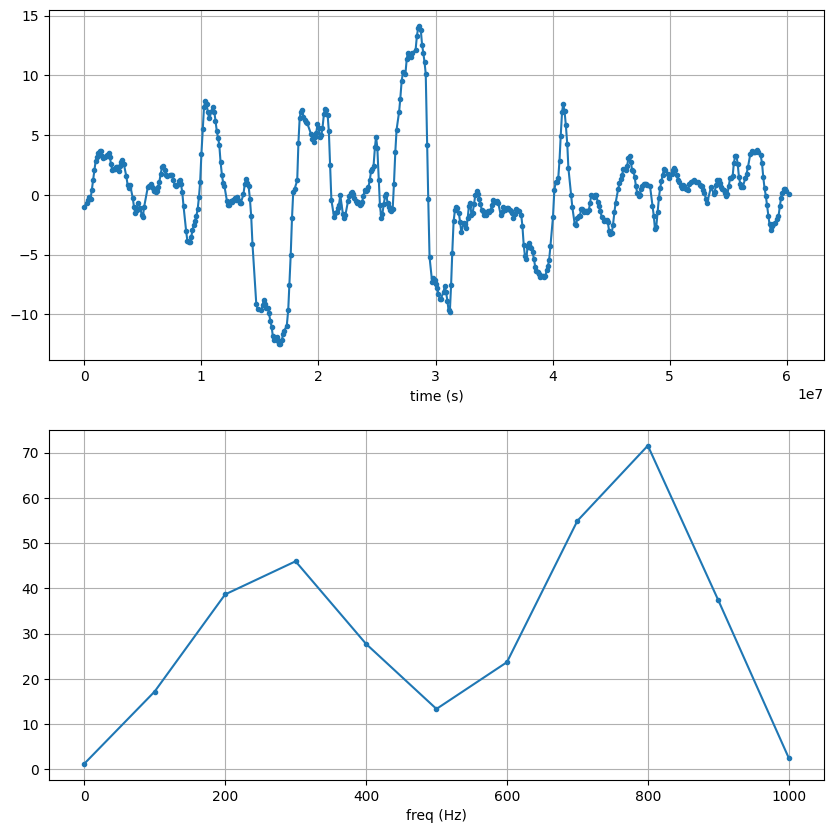

In [14]:
t = m4_nofault["TimeUS"]
y = m4_nofault["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

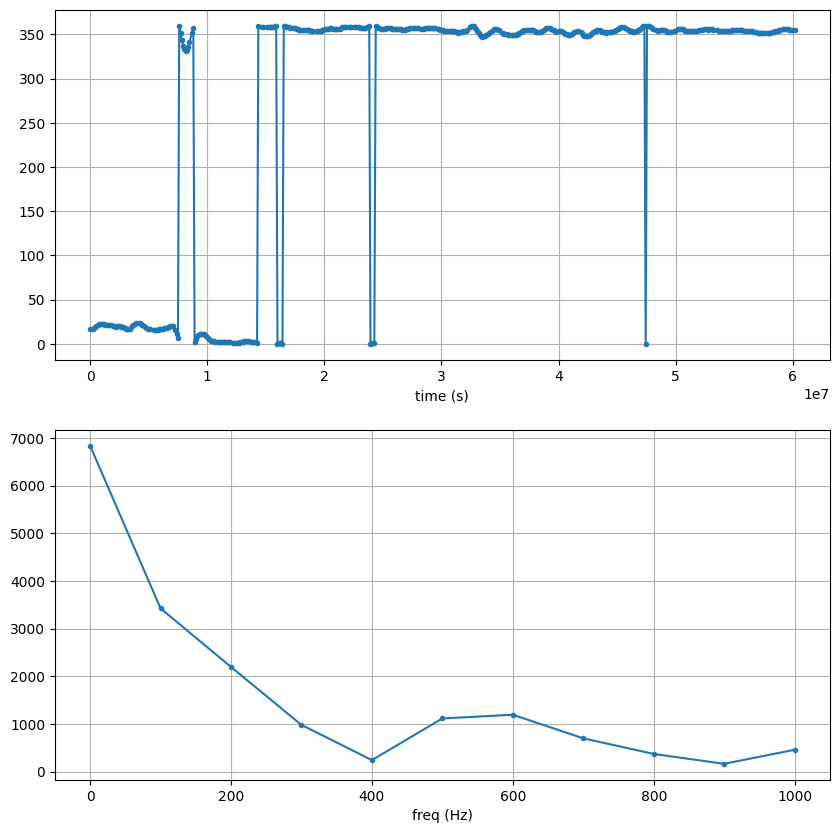

In [15]:
t = m4_nofault["TimeUS"]
y = m4_nofault["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

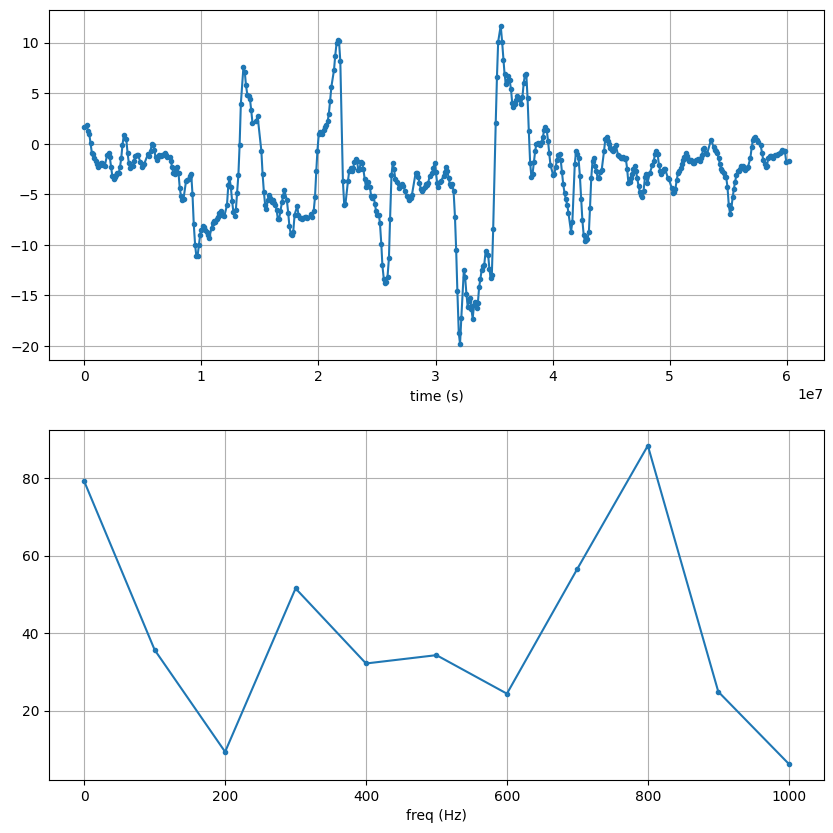

In [16]:
t = m4_nofault["TimeUS"]
y = m4_nofault["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

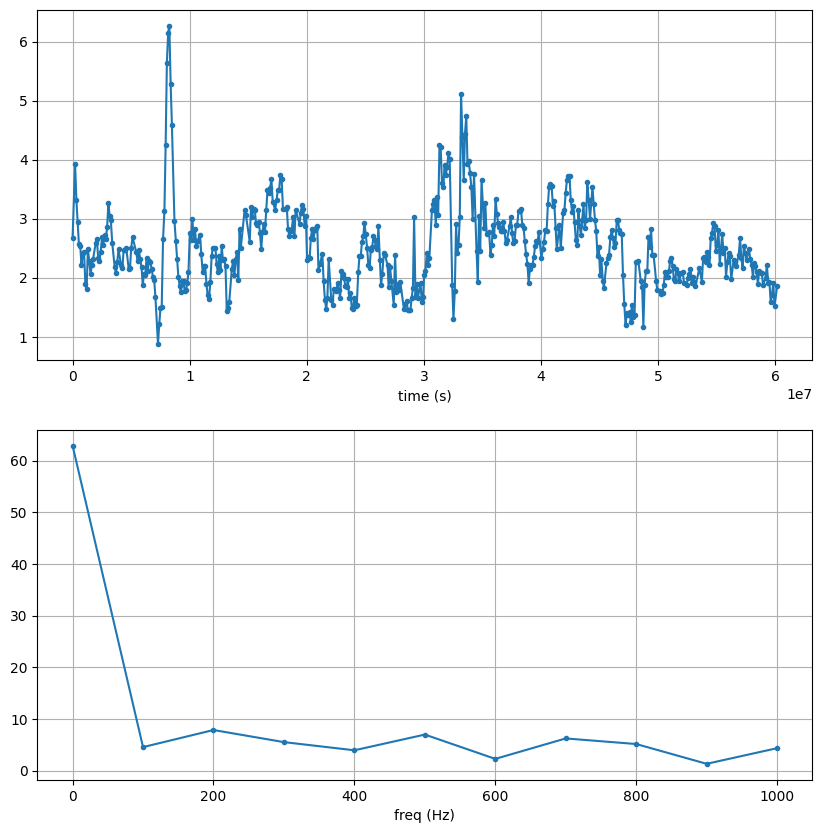

In [17]:
t = m4_nofault["TimeUS"]
y = m4_nofault["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

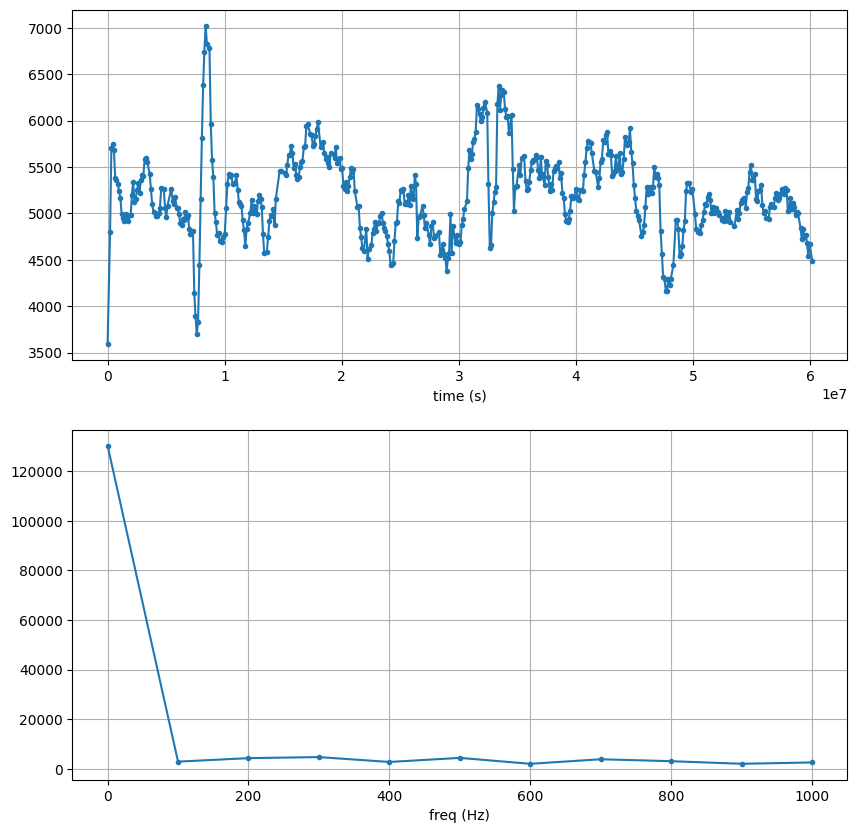

In [18]:
t = m4_nofault["TimeUS"]
y = m4_nofault["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

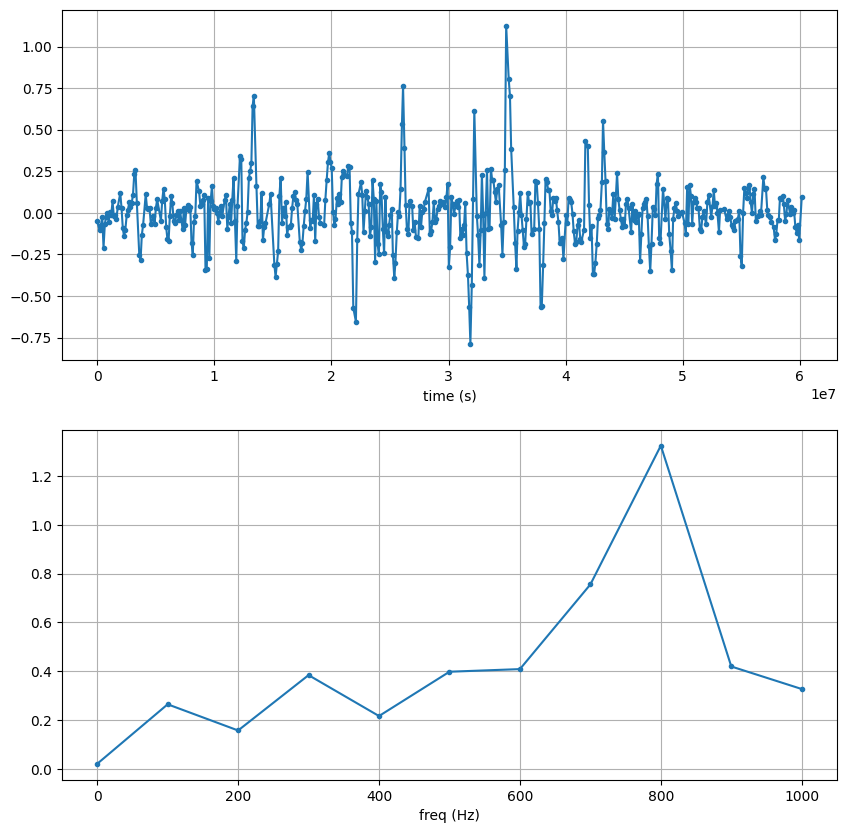

In [19]:
t = m4_nofault["TimeUS"]
y = m4_nofault["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

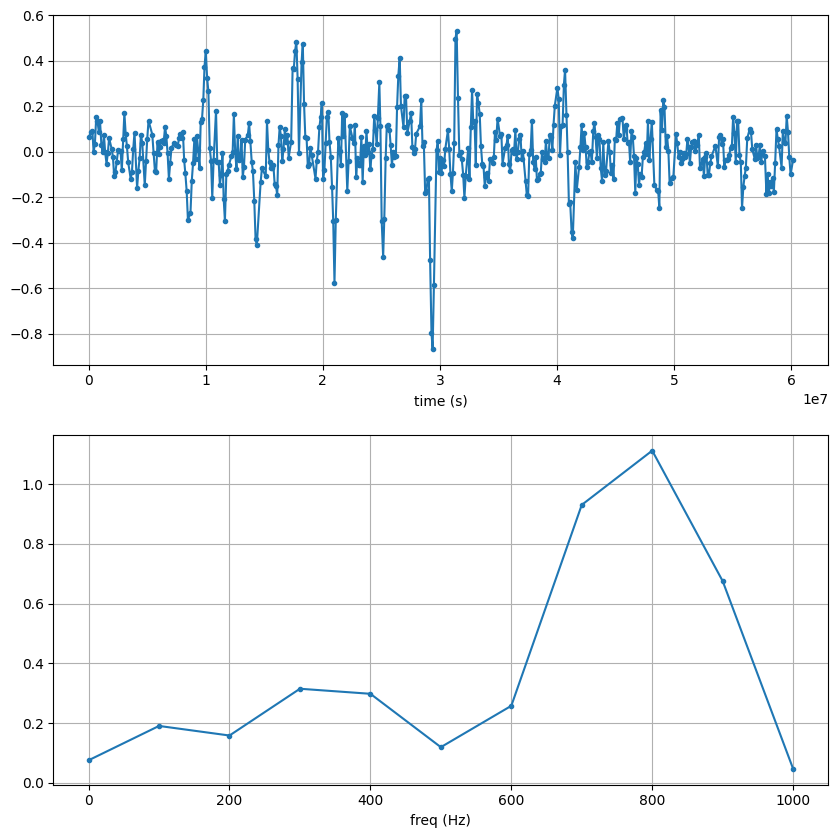

In [20]:
t = m4_nofault["TimeUS"]
y = m4_nofault["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

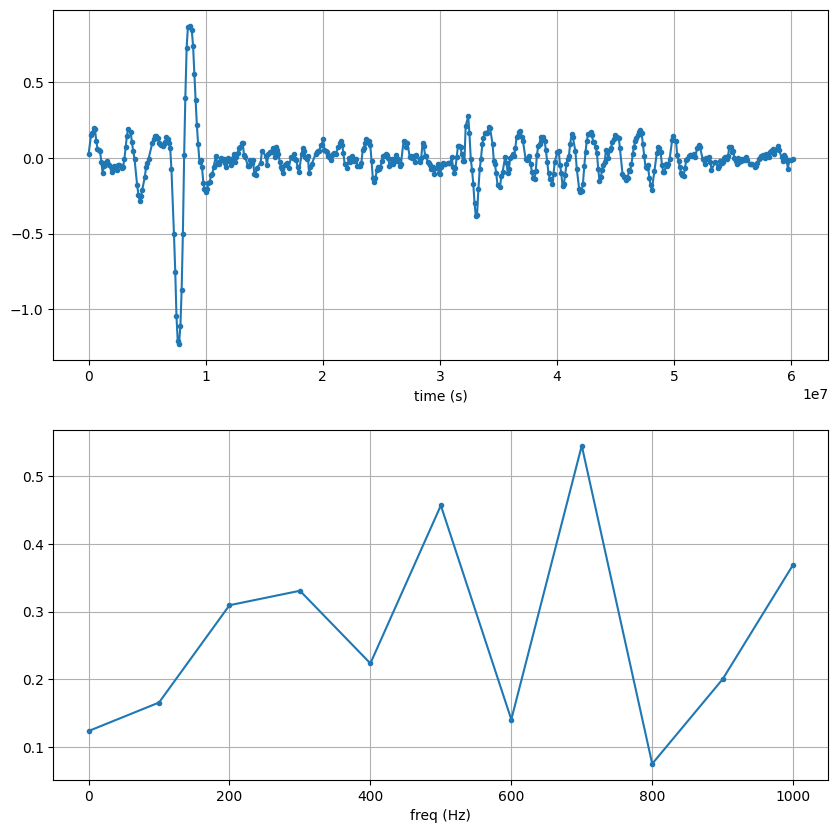

In [21]:
t = m4_nofault["TimeUS"]
y = m4_nofault["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

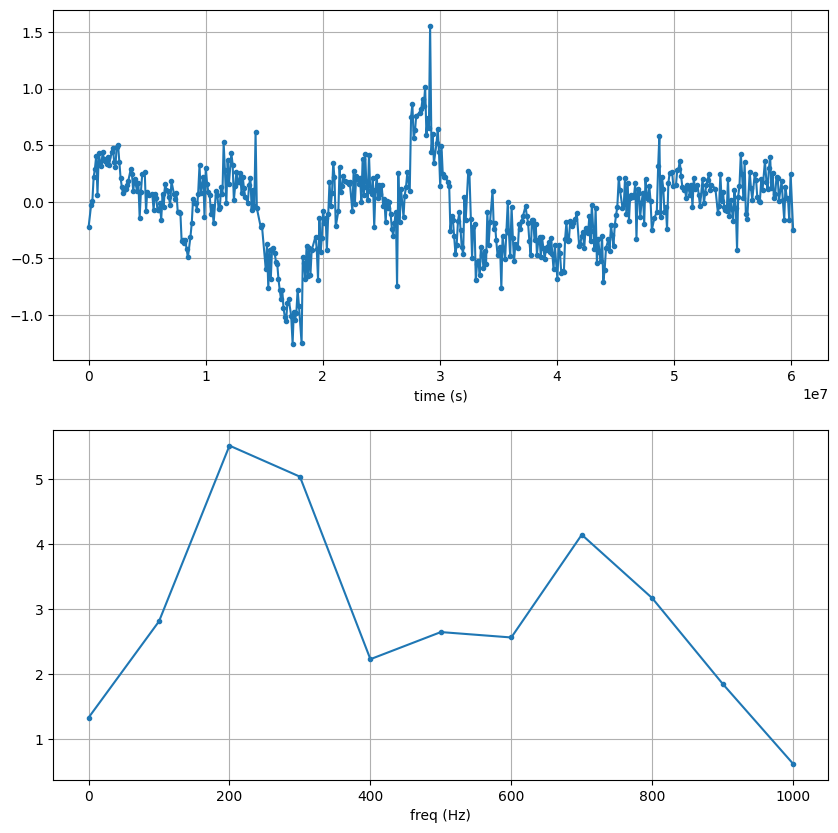

In [22]:
t = m4_nofault["TimeUS"]
y = m4_nofault["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

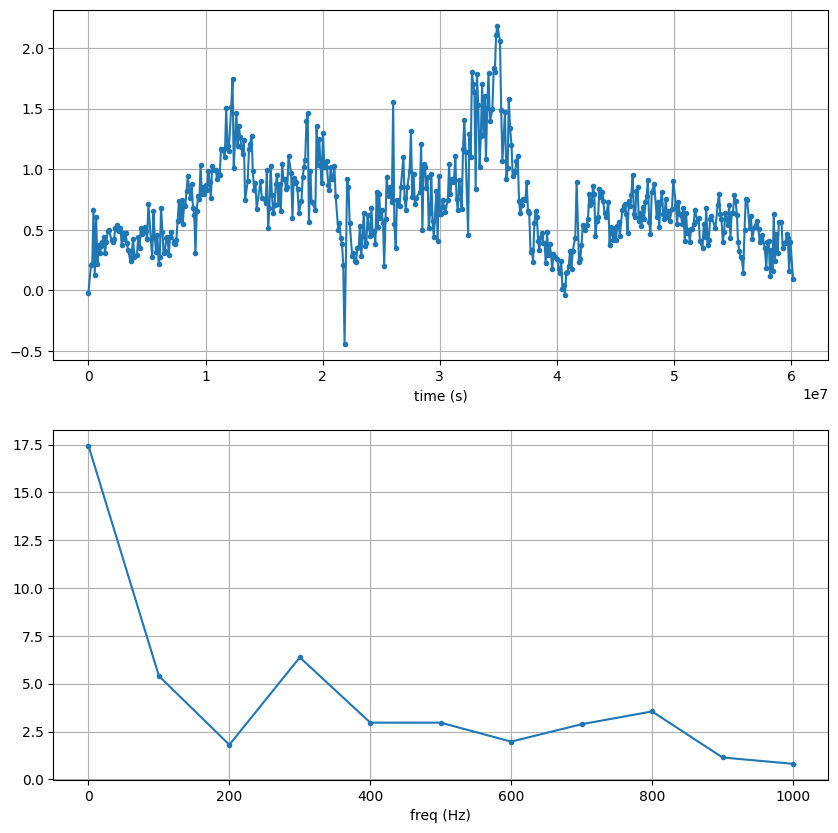

In [23]:
t = m4_nofault["TimeUS"]
y = m4_nofault["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

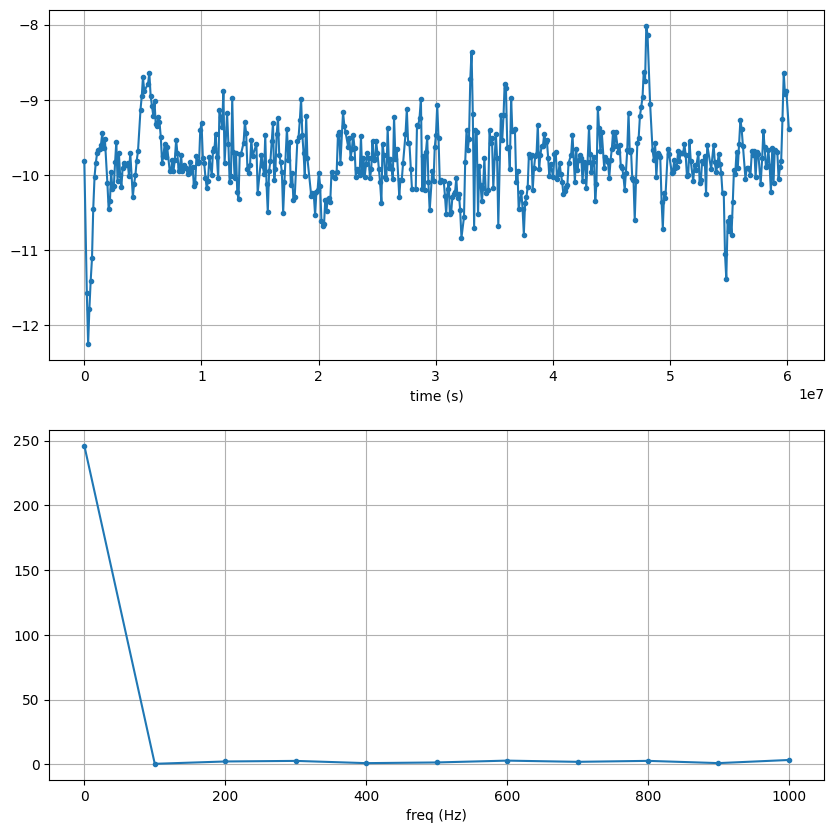

In [24]:
t = m4_nofault["TimeUS"]
y = m4_nofault["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()